In [1]:
import sys
sys.path.insert(0, 'C:\\Users\\fl6344\\Desktop\\Baldea\\MHE_learning_dynamics\\DySMHO\\model')
sys.path.insert(0, 'C:\\Users\\fl6344\\Desktop\\Baldea\\MHE_learning_dynamics\\DySMHO\\data')

import model_3D
import utils_3D
import L_data_generation
import numpy as np
from importlib import reload
import matplotlib.pyplot as plt

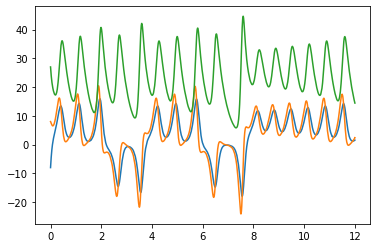



--------------------------- Smoothing data ---------------------------


Prev STD: 0.00126 - New STD: 0.00125 - Percent change: -1.36126
No smoothing applied


Prev STD: 0.00142 - New STD: 0.00141 - Percent change: -0.59916
No smoothing applied


Prev STD: 0.00524 - New STD: 0.00522 - Percent change: -0.40885
No smoothing applied




--------- Pre-processing 1: Dimension 1 ---------
                      0             1
y0         0.000000e+00  0.000000e+00
y1         0.000000e+00  0.000000e+00
y2         1.534630e-38  3.445164e-39
y0*y1      6.003202e-10  9.179302e-12
y0*y2      0.000000e+00  0.000000e+00
y1*y2      0.000000e+00  0.000000e+00
y0^2       2.087991e-01  3.732889e-05
y1^2       3.486640e-39  8.048085e-40
y2^2       1.454345e-48  4.690487e-49
(y0^2)*y1  0.000000e+00  0.000000e+00
y0*(y1^2)  0.000000e+00  0.000000e+00
(y0^2)*y2  1.407529e-04  3.956236e-07
y0*(y2^2)  0.000000e+00  0.000000e+00
(y1^2)*y2  2.256799e-28  2.921658e-29
y1*(y2^2)  0.000000e+00  0.000000e+00
 y0^

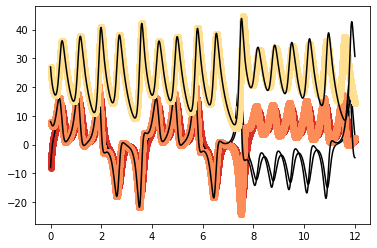

In [15]:
y_init = [-8, 8, 27]

horizon_length = 2  # horizon length for optimization problem
time_steps = 10  # number of time steps taken in the MHE


# Data generation (time grid)
xs = np.linspace(0, horizon_length + time_steps, 1000 * (horizon_length + time_steps) + 1)
# Data generation (simulating true dynamics on the time grid with addition of white noise )
t, y = L_data_generation.data_gen(xs, y_init, [0, 0.005, 0, 0.005, 0, 0.005], False)
t_nf, y_nf = L_data_generation.data_gen(xs, y_init, [0, 0, 0, 0, 0, 0], False)

plt.plot(t,y)
plt.show()

# Basis functions
basis_functions_y0 = [lambda y0, y1, y2: 1, 
                      lambda y0, y1, y2: y0,
                      lambda y0, y1, y2: y1,
                      lambda y0, y1, y2: y2,  
                      lambda y0, y1, y2: y0*y1,
                      lambda y0, y1, y2: y0*y2,
                      lambda y0, y1, y2: y1*y2,
                      lambda y0, y1, y2: y0**2,
                      lambda y0, y1, y2: y1**2,
                      lambda y0, y1, y2: y2**2,
                      lambda y0, y1, y2: (y0**2)*y1,
                      lambda y0, y1, y2: y0*(y1**2),
                      lambda y0, y1, y2: (y0**2)*y2,
                      lambda y0, y1, y2: y0*(y2**2),
                      lambda y0, y1, y2: (y1**2)*y2,
                      lambda y0, y1, y2: y1*(y2**2),
                      lambda y0, y1, y2: y0**3,
                      lambda y0, y1, y2: y0**4,
                      lambda y0, y1, y2: np.exp(y0), 
                      lambda y0, y1, y2: 1/y0, 
                      lambda y0, y1, y2: np.sin(y0),
                      lambda y0, y1, y2: np.cos(y0)]

basis_functions_y1 = [lambda y0, y1, y2: 1, 
                      lambda y0, y1, y2: y0,
                      lambda y0, y1, y2: y1,
                      lambda y0, y1, y2: y2,  
                      lambda y0, y1, y2: y0*y1,
                      lambda y0, y1, y2: y0*y2,
                      lambda y0, y1, y2: y1*y2,
                      lambda y0, y1, y2: y0**2,
                      lambda y0, y1, y2: y1**2,
                      lambda y0, y1, y2: y2**2,
                      lambda y0, y1, y2: (y0**2)*y1,
                      lambda y0, y1, y2: y0*(y1**2),
                      lambda y0, y1, y2: (y0**2)*y2,
                      lambda y0, y1, y2: y0*(y2**2),
                      lambda y0, y1, y2: (y1**2)*y2,
                      lambda y0, y1, y2: y1*(y2**2),
                      lambda y0, y1, y2: y1**3,
                      lambda y0, y1, y2: y1**4,
                      lambda y0, y1, y2: np.exp(y1), 
                      lambda y0, y1, y2: 1/y1, 
                      lambda y0, y1, y2: np.sin(y1),
                      lambda y0, y1, y2: np.cos(y1)]

basis_functions_y2 = [lambda y0, y1, y2: 1, 
                      lambda y0, y1, y2: y0,
                      lambda y0, y1, y2: y1,
                      lambda y0, y1, y2: y2,  
                      lambda y0, y1, y2: y0*y1,
                      lambda y0, y1, y2: y0*y2,
                      lambda y0, y1, y2: y1*y2,
                      lambda y0, y1, y2: y0**2,
                      lambda y0, y1, y2: y1**2,
                      lambda y0, y1, y2: y2**2,
                      lambda y0, y1, y2: (y0**2)*y1,
                      lambda y0, y1, y2: y0*(y1**2),
                      lambda y0, y1, y2: (y0**2)*y2,
                      lambda y0, y1, y2: y0*(y2**2),
                      lambda y0, y1, y2: (y1**2)*y2,
                      lambda y0, y1, y2: y1*(y2**2),
                      lambda y0, y1, y2: y2**3,
                      lambda y0, y1, y2: y2**4,
                      lambda y0, y1, y2: np.exp(y2), 
                      lambda y0, y1, y2: 1/y2, 
                      lambda y0, y1, y2: np.sin(y2),
                      lambda y0, y1, y2: np.cos(y2)]

# Basis function names
basis_functions_names_y0 = ['1','y0', 'y1', 'y2', 'y0*y1', 'y0*y2', 'y1*y2', 'y0^2', 'y1^2', 'y2^2', '(y0^2)*y1', 'y0*(y1^2)', '(y0^2)*y2', 'y0*(y2^2)',
                            '(y1^2)*y2', 'y1*(y2^2)', ' y0^3',  'y0^4', 'exp(y0)', '1/y0', 'sin(y0)', 'cos(y0)']
basis_functions_names_y1 = ['1','y0', 'y1', 'y2', 'y0*y1', 'y0*y2', 'y1*y2', 'y0^2', 'y1^2', 'y2^2', '(y0^2)*y1', 'y0*(y1^2)', '(y0^2)*y2', 'y0*(y2^2)',
                            '(y1^2)*y2', 'y1*(y2^2)', ' y1^3',  'y1^4', 'exp(y1)', '1/y1', 'sin(y1)', 'cos(y1)']
basis_functions_names_y2 = ['1','y0', 'y1', 'y2', 'y0*y1', 'y0*y2', 'y1*y2', 'y0^2', 'y1^2', 'y2^2', '(y0^2)*y1', 'y0*(y1^2)', '(y0^2)*y2', 'y0*(y2^2)',
                            '(y1^2)*y2', 'y1*(y2^2)', ' y2^3',  'y2^4', 'exp(y2)', '1/y2', 'sin(y2)', 'cos(y2)']

basis_y0 = {'functions': basis_functions_y0, 'names': basis_functions_names_y0} 
basis_y1 = {'functions': basis_functions_y1, 'names': basis_functions_names_y1}
basis_y2 = {'functions': basis_functions_y2, 'names': basis_functions_names_y2}




reload(utils_3D)
reload(model_3D)

# Creating MHL class
L_example = model_3D.threeD_MHL(y,t, [basis_y0,basis_y1,basis_y1])
L_example.smooth()
L_example.pre_processing_1()
L_example.pre_processing_2(significance = 0.7, plot = False)
L_example.discover(horizon_length,
                   time_steps,
                   data_step = 100,
                   optim_options = {'nfe':80, 'ncp':5},
                   thresholding_frequency = 10,
                   thresholding_tolerance = 1)
L_example.validate(xs, y_nf, plot = True)
    